In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import csv

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,Private,309513,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
1,1,33,Private,205469,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,2,46,Private,149949,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,3,23,Private,193090,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,0
4,4,55,Private,60193,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17475,17475,35,NaN,320084,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,0,0,55,United-States,1
17476,17476,30,NaN,33811,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,0
17477,17477,71,NaN,287372,Doctorate,16,Married-civ-spouse,NaN,Husband,White,Male,0,0,10,United-States,1
17478,17478,41,NaN,202822,HS-grad,9,Separated,NaN,Not-in-family,Black,Female,0,0,32,United-States,0


In [4]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(df)

결측치가 있는 컬럼은: workclass 입니다
해당 컬럼에 총 1836 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: occupation 입니다
해당 컬럼에 총 1843 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: native.country 입니다
해당 컬럼에 총 583 개의 결측치가 존재합니다.


In [5]:
# 결측치를 처리하는 함수를 작성합니다.
def handle_na(data, missing_col):
    temp = data.copy()
    for col, dtype in missing_col:
        if dtype == 'O':
            # 범주형 feature가 결측치인 경우 해당 행들을 삭제해 주었습니다.
            temp = temp.dropna(subset=[col])
    return temp

df = handle_na(df, missing_col)

# 결측치 처리가 잘 되었는지 확인해 줍니다.
missing_col = check_missing_col(df) 

결측치가 존재하지 않습니다


In [6]:
df.info() #기본정보

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15081 entries, 0 to 15080
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              15081 non-null  int64 
 1   age             15081 non-null  int64 
 2   workclass       15081 non-null  object
 3   fnlwgt          15081 non-null  int64 
 4   education       15081 non-null  object
 5   education.num   15081 non-null  int64 
 6   marital.status  15081 non-null  object
 7   occupation      15081 non-null  object
 8   relationship    15081 non-null  object
 9   race            15081 non-null  object
 10  sex             15081 non-null  object
 11  capital.gain    15081 non-null  int64 
 12  capital.loss    15081 non-null  int64 
 13  hours.per.week  15081 non-null  int64 
 14  native.country  15081 non-null  object
 15  target          15081 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 2.0+ MB


In [7]:
df_categories=df[['workclass','education','marital.status','occupation','relationship','race','sex','native.country','target']]

In [8]:
df['target'].value_counts()  # target의 분포

0    11308
1     3773
Name: target, dtype: int64

In [9]:
pd.crosstab(df['workclass'],df['target'])  #target별 workclass 분포

target,0,1
workclass,,
Federal-gov,291,177
Local-gov,718,309
Private,8713,2445
Self-emp-inc,251,301
Self-emp-not-inc,867,363
State-gov,462,178
Without-pay,6,0


In [10]:
#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            #dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

df = label_encoder(df, make_label_map(df))

In [11]:
df

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,0,309513,0,12,0,0,0,0,0,0,0,40,0,0
1,1,33,0,205469,1,10,0,1,0,0,0,0,0,40,0,1
2,2,46,0,149949,1,10,0,0,0,0,0,0,0,40,0,0
3,3,23,0,193090,2,13,1,2,1,0,1,0,0,30,0,0
4,4,55,0,60193,3,9,2,2,2,0,1,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,15076,35,0,337286,7,14,1,1,2,2,0,0,0,40,0,0
15077,15077,36,0,182074,1,10,2,2,2,0,0,0,0,45,0,0
15078,15078,50,4,175070,4,15,0,3,0,0,0,0,0,45,0,1
15079,15079,39,0,202937,1,10,2,10,2,0,1,0,0,40,1,0


In [10]:
# workclass를 특정그룹끼리 묶기
for data in [df]:
    for i in range(df.shape[0]):
        workclass = df['workclass'].iloc[i]
        if workclass in ["Federal-gov", "Local-gov","State-gov"]:
            df['workclass'].iloc[i] = 0
        elif workclass in ["Private", "Self-emp-not-inc"]:
            df['workclass'].iloc[i] = 1
        elif workclass in ["Self-emp-inc"]:
            df['workclass'].iloc[i] = 2
        else:
            df['workclass'].iloc[i] = 3

C:\Users\zzuge\AppData\Local\Temp\ipykernel_11156\3817831351.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workclass'].iloc[i] = 1
C:\Users\zzuge\AppData\Local\Temp\ipykernel_11156\3817831351.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workclass'].iloc[i] = 0
C:\Users\zzuge\AppData\Local\Temp\ipykernel_11156\3817831351.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['workclass'].iloc[i] = 2
C:\Users\zzuge\

In [11]:
pd.crosstab(df['education'],df['target']) #target별 education 분포

target,0,1
education,,
10th,370,27
11th,508,29
12th,183,10
1st-4th,76,3
5th-6th,147,5
7th-8th,271,18
9th,223,12
Assoc-acdm,390,139
Assoc-voc,476,173


In [ ]:
for data in [df]:
    for i in range(df.shape[0]):
        education = df['education'].iloc[i]
        if education in ["Bachelors","Doctorate","Masters"]:
            df['education'].iloc[i] = 0
        else:
            df['education'].iloc[i] = 1

C:\Users\zzuge\AppData\Local\Temp\ipykernel_11156\808313472.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'].iloc[i] = 1
C:\Users\zzuge\AppData\Local\Temp\ipykernel_11156\808313472.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education'].iloc[i] = 0


In [ ]:
pd.crosstab(df['marital.status'],df['target']) #target별 marital.status 분포

target,0,1
marital.status,,
Divorced,2068,247
Married-AF-spouse,9,5
Married-civ-spouse,4503,3500
Married-spouse-absent,228,19
Never-married,5518,253
Separated,506,34
Widowed,542,48


In [ ]:
for data in [df]:
    for i in range(df.shape[0]):
        marital_status = df['marital.status'].iloc[i]
        if marital_status in ["Married-AF-spouse", "Married-civ-spouse"]:
            df['marital.status'].iloc[i] = 0
        else:
            df['marital.status'].iloc[i] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
pd.crosstab(df['occupation'],df['target']) #target별 occupation 분포

target,0,1
occupation,,
Adm-clerical,1631,262
Armed-Forces,3,0
Craft-repair,1624,477
Exec-managerial,1090,1023
Farming-fishing,443,65
Handlers-cleaners,656,39
Machine-op-inspct,907,133
Other-service,1605,72
Priv-house-serv,83,0


In [ ]:
for data in [df]:
    for i in range(df.shape[0]):
        occupation = df['occupation'].iloc[i]
        if occupation in ["Married-AF-spouse", "Married-civ-spouse"]:
            df['occupation'].iloc[i] = 0
        else:
            df['occupation'].iloc[i] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
pd.crosstab(df['relationship'],df['target']) #target별 relationship 분포

target,0,1
relationship,,
Husband,3900,3072
Not-in-family,3953,462
Other-relative,512,21
Own-child,2796,38
Unmarried,1715,107
Wife,498,406


In [ ]:
for data in [df]:
    for i in range(df.shape[0]):
        relationship = df['relationship'].iloc[i]
        if relationship in ["Husband", "Wife"]:
            df['relationship'].iloc[i] = 0
        else:
            df['relationship'].iloc[i] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
pd.crosstab(df['race'],df['target']) #target별 race 분포

target,0,1
race,,
Amer-Indian-Eskimo,141,24
Asian-Pac-Islander,450,136
Black,1509,193
Other,148,15
White,11126,3738


In [ ]:
for data in [df]:
    for i in range(df.shape[0]):
        race = df['race'].iloc[i]
        if race in ["White"]:
            df['race'].iloc[i] = 0
        elif race in ["Black"]:
            df['race'].iloc[i] = 1
        else:
            df['race'].iloc[i] = 2

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
pd.crosstab(df['sex'],df['target']) #target별 성별 분포

target,0,1
sex,,
Female,5258,632
Male,8116,3474


In [ ]:
for data in [df]:
    for i in range(df.shape[0]):
        sex = df['sex'].iloc[i]
        if sex in ["Female"]:
            df['sex'].iloc[i] = 0
        else:
            df['sex'].iloc[i] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
pd.crosstab(df['native.country'],df['target']) #target별 native.country 분포

target,0,1
native.country,,
Cambodia,8,3
Canada,41,22
China,32,8
Columbia,36,1
Cuba,36,13
Dominican-Republic,37,1
Ecuador,15,4
El-Salvador,51,7
England,32,14


In [ ]:
for data in [df]:
    for i in range(df.shape[0]):
        native_country = df['native.country'].iloc[i]
        if native_country in ["United-States"]:
            df['native.country'].iloc[i] = 0
        elif native_country in ["Canada","China","England","France","Germany","Holand-Netherlands","India","Iran","Ireland","Italy","Japan","Mexico","Poland","South","Taiwan","Thailnad"]:
            df['native.country'].iloc[i] = 1
        else:
            df['native.country'].iloc[i] = 2

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [12]:
df

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,0,32,0,309513,0,12,0,0,0,0,0,0,0,40,0,0
1,1,33,0,205469,1,10,0,1,0,0,0,0,0,40,0,1
2,2,46,0,149949,1,10,0,0,0,0,0,0,0,40,0,0
3,3,23,0,193090,2,13,1,2,1,0,1,0,0,30,0,0
4,4,55,0,60193,3,9,2,2,2,0,1,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,15076,35,0,337286,7,14,1,1,2,2,0,0,0,40,0,0
15077,15077,36,0,182074,1,10,2,2,2,0,0,0,0,45,0,0
15078,15078,50,4,175070,4,15,0,3,0,0,0,0,0,45,0,1
15079,15079,39,0,202937,1,10,2,10,2,0,1,0,0,40,1,0


In [13]:
df[['sex','race','workclass','education','marital.status','relationship','native.country','occupation']].astype(str)

,sex,race,workclass,education,marital.status,relationship,native.country,occupation
0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1
2,0,0,0,1,0,0,0,0
3,1,0,0,2,1,1,0,2
4,1,0,0,3,2,2,0,2
...,...,...,...,...,...,...,...,...
15076,0,2,0,7,1,2,0,1
15077,0,0,0,1,2,2,0,2
15078,0,0,4,4,0,0,0,3
15079,1,0,0,1,2,2,1,10


In [14]:
df[['occupation']].astype(str)

,occupation
0,0
1,1
2,0
3,2
4,2
...,...
15076,1
15077,2
15078,3
15079,10


In [15]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
df_categories_encoded = pd.DataFrame() 

for i in df_categories.columns :
  df_categories_encoded[i]=label.fit_transform(df_categories[i])

In [16]:
df_categories_encoded

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,target
0,2,7,2,2,0,4,1,38,0
1,2,15,2,3,0,4,1,38,1
2,2,15,2,2,0,4,1,38,0
3,2,9,4,0,3,4,0,38,0
4,2,11,0,0,1,4,0,38,0
...,...,...,...,...,...,...,...,...,...
15076,2,12,4,3,1,1,1,38,0
15077,2,15,0,0,1,4,1,38,0
15078,3,14,2,9,0,4,1,38,1
15079,2,15,0,12,1,4,0,30,0


In [17]:
from scipy.stats import chi2_contingency
import numpy as np




def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [18]:
#범주형 자료간 상관관계 코로머 상수 구하기
rows= []

for var1 in df_categories_encoded:
  col = []
  for var2 in df_categories_encoded :
    cramers =cramers_V(df_categories_encoded[var1], df_categories_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df_1 = pd.DataFrame(cramers_results, columns = df_categories_encoded.columns, index =df_categories_encoded.columns)



df_1

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,target
workclass,1.00,0.01,0.01,0.05,0.01,0.00,0.02,0.00,0.03
education,0.01,1.00,0.01,0.04,0.01,0.01,0.01,0.02,0.14
marital.status,0.01,0.01,1.00,0.02,0.24,0.01,0.21,0.01,0.20
occupation,0.05,0.04,0.02,1.00,0.03,0.01,0.20,0.01,0.12
relationship,0.01,0.01,0.24,0.03,1.00,0.01,0.43,0.01,0.20
race,0.00,0.01,0.01,0.01,0.01,1.00,0.02,0.18,0.01
sex,0.02,0.01,0.21,0.20,0.43,0.02,1.00,0.01,0.05
native.country,0.00,0.02,0.01,0.01,0.01,0.18,0.01,1.00,0.01
target,0.03,0.14,0.20,0.12,0.20,0.01,0.05,0.01,1.00


C:\Users\zzuge\AppData\Local\Temp\ipykernel_18272\3344048186.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_1, dtype=np.bool)


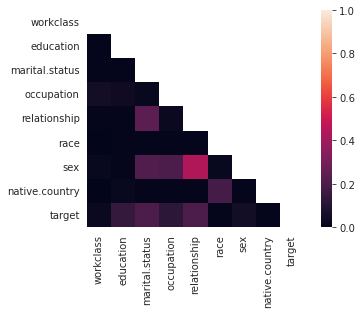

In [19]:
#상관관계 그래프
import seaborn as sns
import matplotlib.pyplot as plt



mask = np.zeros_like(df_1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df_1, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

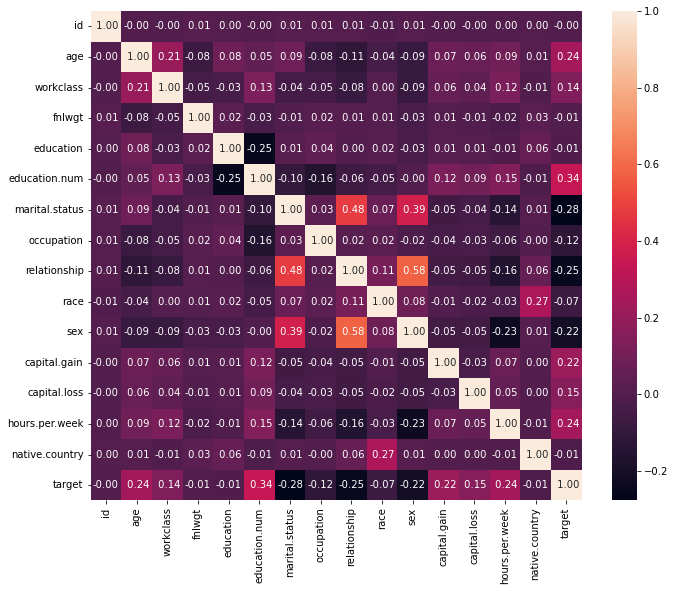

In [20]:
# 연속형변수와 target의 상관관계 그래프
f, ax=plt.subplots(figsize=(11,9))
sns.heatmap(df.corr(), annot=True, fmt=" .2f", ax=ax)
plt.show()

In [ ]:
#이상치 제거는 맨처음 선형회귀할때 이용 
def remove_outlier(df, column):
    fraud = df[column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    # IQR에 1.5를 곱한다.
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * 1.5

    # 최댓갑과 최솟값 연산.
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    # 아웃라이어 필터링 후 아웃라이어에 해당되는 인덱스 리턴
    outlier_index = fraud[(fraud < lowest_val) |( fraud > highest_val)].index
    return outlier_index

In [21]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [22]:
df=df.drop(['id'],axis=1)

In [23]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,target
0,32,0,309513,0,12,0,0,0,0,0,0,0,40,0,0
1,33,0,205469,1,10,0,1,0,0,0,0,0,40,0,1
2,46,0,149949,1,10,0,0,0,0,0,0,0,40,0,0
3,23,0,193090,2,13,1,2,1,0,1,0,0,30,0,0
4,55,0,60193,3,9,2,2,2,0,1,0,0,40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,35,0,337286,7,14,1,1,2,2,0,0,0,40,0,0
15077,36,0,182074,1,10,2,2,2,0,0,0,0,45,0,0
15078,50,4,175070,4,15,0,3,0,0,0,0,0,45,0,1
15079,39,0,202937,1,10,2,10,2,0,1,0,0,40,1,0


In [24]:
y_target = df['target']
x_features =df.drop(['target'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_features, y_target, test_size = .3, random_state=777)

In [25]:
test=pd.read_csv('test.csv')

In [26]:
test

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0,47,Private,304133,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
1,1,34,Self-emp-inc,154227,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,75,United-States
2,2,31,Local-gov,158291,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,8614,0,40,United-States
3,3,28,Private,183155,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States
4,4,54,Local-gov,182543,Some-college,10,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,15076,30,Local-gov,182926,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,15024,0,40,United-States
15077,15077,39,Private,176101,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
15078,15078,48,Private,242406,11th,7,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,Puerto-Rico
15079,15079,44,Private,100584,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States


In [30]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(test)

결측치가 존재하지 않습니다


In [35]:
#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            #dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

df = label_encoder(test, make_label_map(test))

In [36]:
test_features =test.drop(['id'],axis=1)

In [27]:
!pip3 install catboost
from catboost import CatBoostClassifier
cbr = CatBoostClassifier(verbose=23,iterations=2079,depth=4)
          
cbr.fit(x_train, y_train)
pred=cbr.predict(x_test)
print("training set score: {:.5f}".format(cbr.score(x_train, y_train))) # 훈련셋 결정계수
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

Learning rate set to 0.014404
0:	learn: 0.6795558	total: 177ms	remaining: 6m 7s
23:	learn: 0.4840966	total: 223ms	remaining: 19.1s
46:	learn: 0.4091911	total: 271ms	remaining: 11.7s
69:	learn: 0.3759376	total: 318ms	remaining: 9.13s
92:	learn: 0.3573743	total: 365ms	remaining: 7.79s
115:	learn: 0.3453178	total: 414ms	remaining: 7.01s
138:	learn: 0.3376424	total: 462ms	remaining: 6.45s
161:	learn: 0.3318529	total: 510ms	remaining: 6.04s
184:	learn: 0.3273306	total: 556ms	remaining: 5.7s
207:	learn: 0.3238156	total: 603ms	remaining: 5.42s
230:	learn: 0.3207562	total: 654ms	remaining: 5.23s
253:	learn: 0.3180277	total: 703ms	remaining: 5.05s
276:	learn: 0.3158310	total: 751ms	remaining: 4.89s
299:	learn: 0.3138349	total: 799ms	remaining: 4.74s
322:	learn: 0.3120558	total: 848ms	remaining: 4.61s
345:	learn: 0.3100864	total: 897ms	remaining: 4.49s
368:	learn: 0.3087658	total: 946ms	remaining: 4.38s
391:	learn: 0.3071217	total: 993ms	remaining: 4.27s
414:	learn: 0.3056987	total: 1.04s	remain

In [38]:
cbr.predict(test_features)

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [28]:
params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(x_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
y_hat = grid_cv.predict(x_test) # y예측
print(f'모델 정확도: {accuracy_score(y_test,pred)}')

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
모델 정확도: 0.8609944751381216


In [39]:
grid_cv.predict(test_features)

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [41]:
model.predict(test_features)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [42]:
pred = model.predict(x_test) # y예측
print("training set score: {:.5f}".format(model.score(x_train, y_train)))
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

training set score: 0.78477
예측 정확도: 0.8015


In [43]:
vo_clf = VotingClassifier(estimators=[("Logistic", model), ("Randomforest", grid_cv), ("CatBoost",cbr)], voting="hard")
vo_clf.fit(x_train,y_train)
pred=vo_clf.predict(x_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

Learning rate set to 0.014404
0:	learn: 0.6795558	total: 1.95ms	remaining: 4.05s
23:	learn: 0.4840966	total: 45.4ms	remaining: 3.89s
46:	learn: 0.4091911	total: 92.7ms	remaining: 4.01s
69:	learn: 0.3759376	total: 137ms	remaining: 3.93s
92:	learn: 0.3573743	total: 181ms	remaining: 3.86s
115:	learn: 0.3453178	total: 227ms	remaining: 3.84s
138:	learn: 0.3376424	total: 271ms	remaining: 3.78s
161:	learn: 0.3318529	total: 315ms	remaining: 3.73s
184:	learn: 0.3273306	total: 359ms	remaining: 3.67s
207:	learn: 0.3238156	total: 402ms	remaining: 3.62s
230:	learn: 0.3207562	total: 449ms	remaining: 3.59s
253:	learn: 0.3180277	total: 492ms	remaining: 3.54s
276:	learn: 0.3158310	total: 536ms	remaining: 3.48s
299:	learn: 0.3138349	total: 580ms	remaining: 3.44s
322:	learn: 0.3120558	total: 624ms	remaining: 3.39s
345:	learn: 0.3100864	total: 669ms	remaining: 3.35s
368:	learn: 0.3087658	total: 714ms	remaining: 3.31s
391:	learn: 0.3071217	total: 757ms	remaining: 3.26s
414:	learn: 0.3056987	total: 802ms	re

In [44]:
vo_clf.predict(test_features)

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)